## Suicide Rates Overview

In [2]:
import pandas as pd
import numpy as np
import scipy as scp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn import metrics

In [3]:
sui=pd.read_csv('Suicide.csv')

In [5]:
sui

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capital,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,06,70,77,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,06,70,77,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,06,70,77,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,06,70,77,179",2309,Generation Z


In [6]:
sui.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country              27820 non-null object
year                 27820 non-null int64
sex                  27820 non-null object
age                  27820 non-null object
suicides_no          27820 non-null int64
population           27820 non-null int64
suicides/100k pop    27820 non-null float64
country-year         27820 non-null object
HDI for year         8364 non-null float64
 gdp_for_year        27820 non-null object
gdp_per_capital      27820 non-null int64
generation           27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
sui.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capital,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796,Boomers


In [8]:
sui.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capital,generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,06,70,77,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,06,70,77,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,06,70,77,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,06,70,77,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,06,70,77,179",2309,Boomers


In [9]:
sui['suicides_no'].max()

22338

In [10]:
sui['suicides_no'].min()

0

In [11]:
sui['suicides_no'].mean()

242.57440690150972

In [12]:
sui['population'].max()

43805214

In [13]:
sui['suicides/100k pop'].max()

224.97

In [14]:
sui['population'].min()

278

## Total suicides from 1985-2016 

In [15]:
sui.groupby('year').max()['suicides_no']

year
1985     6962
1986     7298
1987     6688
1988     6528
1989    12030
1990    12517
1991    12746
1992    15824
1993    20256
1994    22338
1995    21706
1996    20562
1997    18973
1998    18058
1999    20705
2000    21063
2001    21262
2002    20119
2003    18681
2004    17465
2005    15843
2006    14020
2007    13065
2008    11848
2009    11721
2010    11767
2011    11681
2012    11763
2013    11396
2014    11455
2015    11634
2016     1421
Name: suicides_no, dtype: int64

## Maximum and Minimum suicide rates.

In [16]:
sui[sui['suicides_no']==sui['suicides_no'].max()]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capital,generation
20996,Russian Federation,1994,male,35-54 years,22338,19044200,117.3,Russian Federation1994,NaN,"3,95,07,73,01,248",2853,Boomers


In [17]:
sui[sui['suicides_no']==sui['suicides_no'].min()]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capital,generation
9,Albania,1987,female,5-14 years,0,311000,0.0,Albania1987,NaN,"2,15,66,24,900",796,Generation X
10,Albania,1987,female,55-74 years,0,144600,0.0,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
11,Albania,1987,male,5-14 years,0,338200,0.0,Albania1987,NaN,"2,15,66,24,900",796,Generation X
22,Albania,1988,female,5-14 years,0,317200,0.0,Albania1988,NaN,"2,12,60,00,000",769,Generation X
23,Albania,1988,male,5-14 years,0,345000,0.0,Albania1988,NaN,"2,12,60,00,000",769,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
27363,Uruguay,1998,female,5-14 years,0,262973,0.0,Uruguay1998,NaN,"25,38,59,28,198",8420,Millenials
27459,Uruguay,2006,female,5-14 years,0,260187,0.0,Uruguay2006,NaN,"19,57,94,57,966",6362,Millenials
27471,Uruguay,2007,female,5-14 years,0,257931,0.0,Uruguay2007,NaN,"23,41,05,72,634",7581,Generation Z
27495,Uruguay,2009,male,5-14 years,0,263516,0.0,Uruguay2009,NaN,"31,66,09,11,277",10166,Generation Z


In [18]:
sui[sui['population']==sui['population'].max()]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capital,generation
27105,United States,2006,female,35-54 years,3376,43805214,7.71,United States2006,NaN,"1,38,55,88,80,00,000",49666,Boomers


In [19]:
sui[sui['population']==sui['population'].min()]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capital,generation
14059,Kiribati,1991,male,75+ years,0,278,0.0,Kiribati1991,NaN,"4,75,15,189",768,G.I. Generation
14167,Kiribati,2000,male,75+ years,0,278,0.0,Kiribati2000,NaN,"6,72,54,174",928,G.I. Generation


In [20]:
sui.groupby('country').max()['suicides_no']

country
Albania                    39
Antigua and Barbuda         2
Argentina                 745
Armenia                    32
Aruba                       4
                        ...  
United Arab Emirates       52
United Kingdom           1743
United States           11767
Uruguay                   152
Uzbekistan                528
Name: suicides_no, Length: 101, dtype: int64

In [21]:
sui[' gdp_for_year'].max()

'99,88,65,77,331'

In [22]:
sui['gdp_per_capital'].max()

126352

## Plotting/Mapping/Correlation

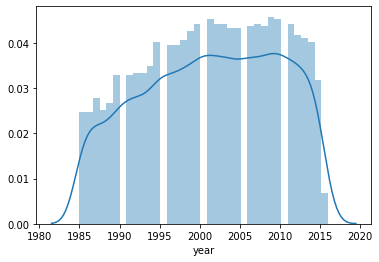

In [23]:
sns.distplot(sui['year'])

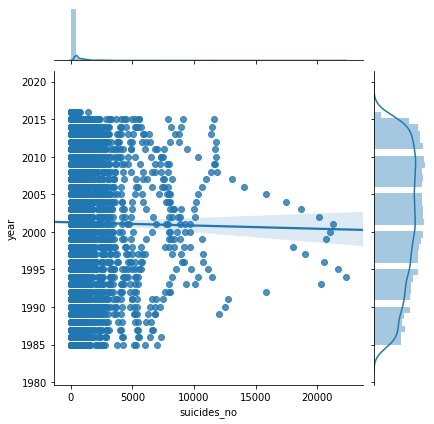

In [24]:
sns.jointplot(x='suicides_no',y='year',data=sui,kind='reg')

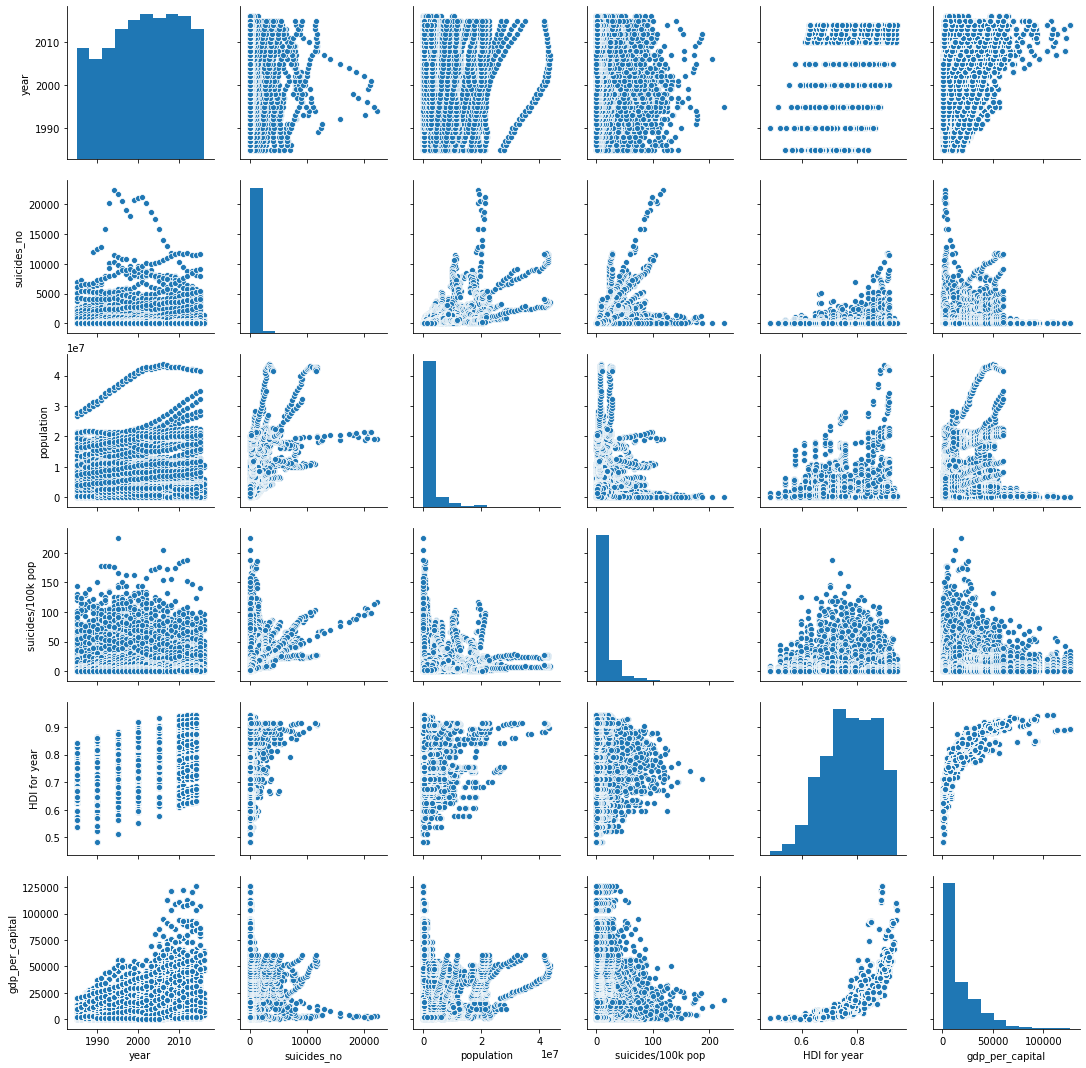

In [26]:
sns.pairplot(sui)

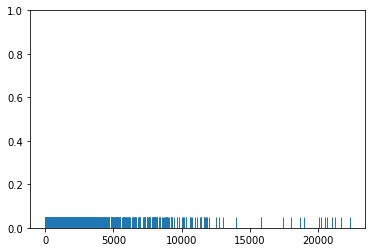

In [86]:
sns.rugplot(sui['suicides_no'])

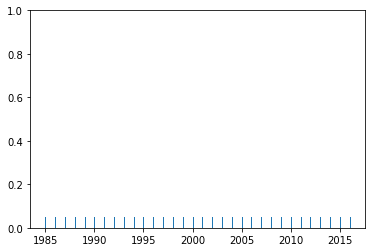

In [27]:
sns.rugplot(sui['year'])

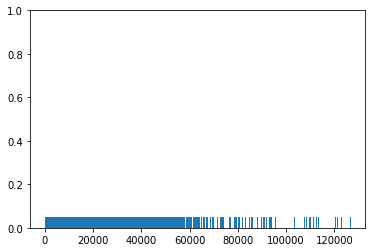

In [88]:
sns.rugplot(sui['gdp_per_capital'])

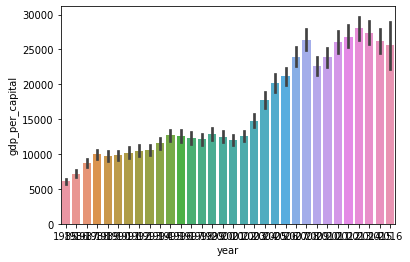

In [52]:
sns.barplot(x='year',y='gdp_per_capital',data=sui)

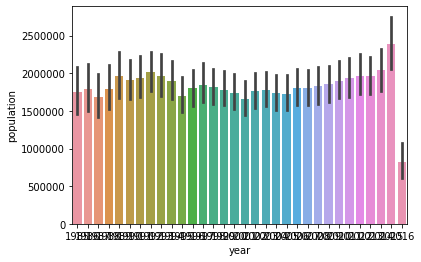

In [51]:
sns.barplot(x='year',y='population',data=sui)

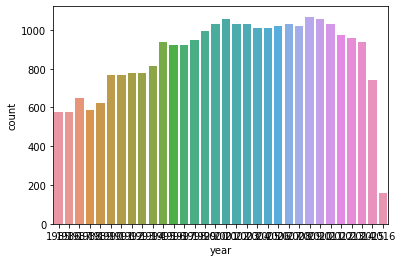

In [28]:
sns.countplot(x='year',data=sui)

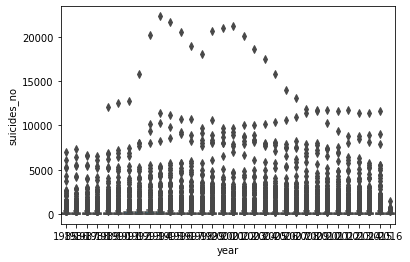

In [50]:
sns.boxplot(x='year',y='suicides_no',data=sui,palette='rainbow')

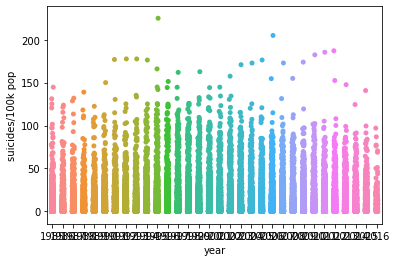

In [166]:
sns.stripplot(x='year',y='suicides/100k pop',data=sui)

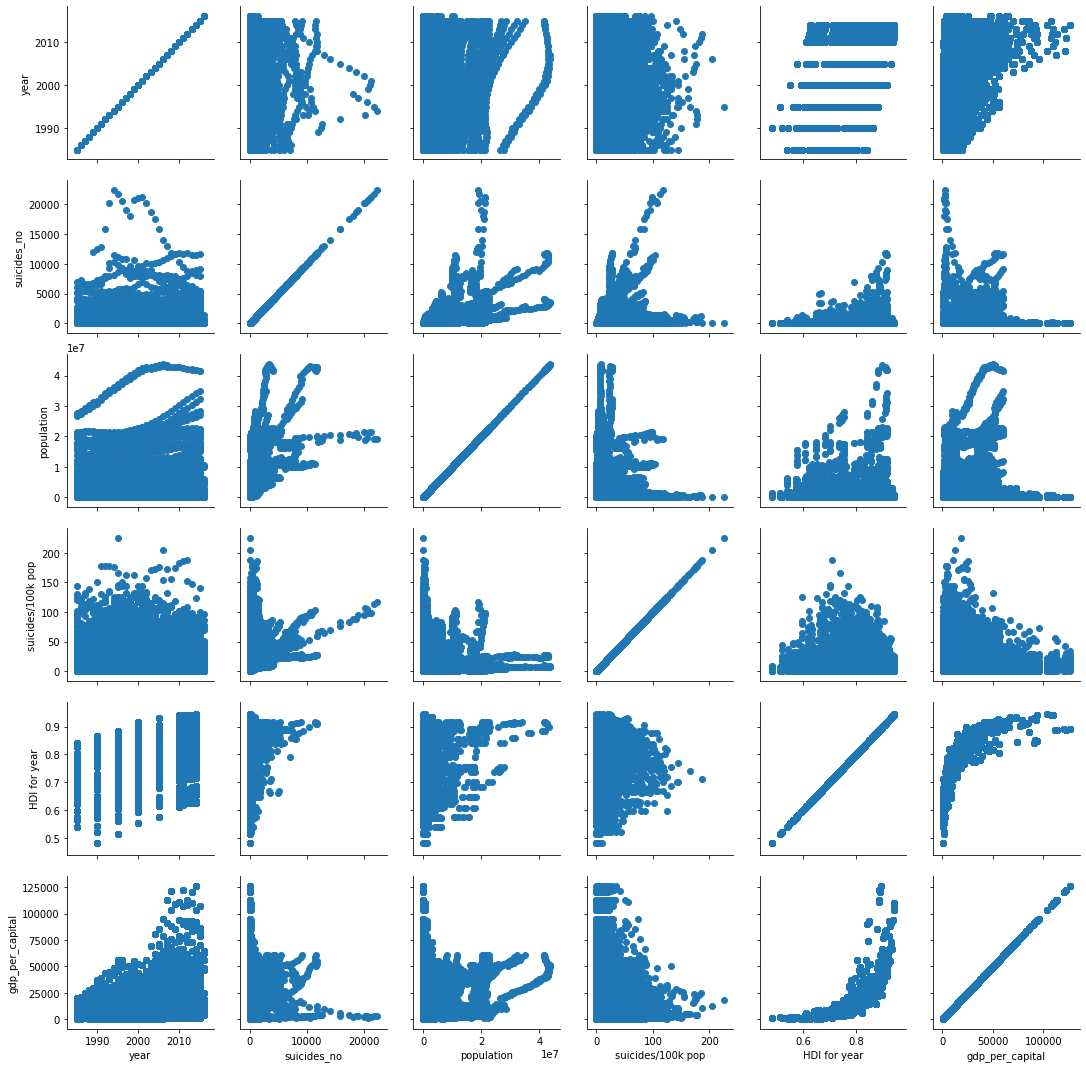

In [101]:
g=sns.PairGrid(sui)
g.map(plt.scatter)

In [102]:
sui.corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capital
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capital,0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


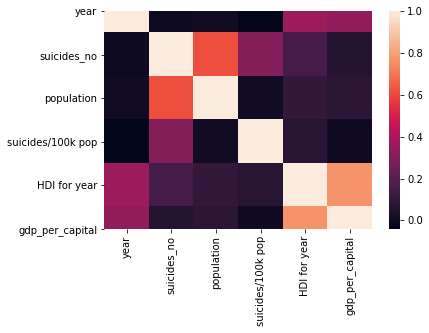

In [103]:
sns.heatmap(sui.corr())

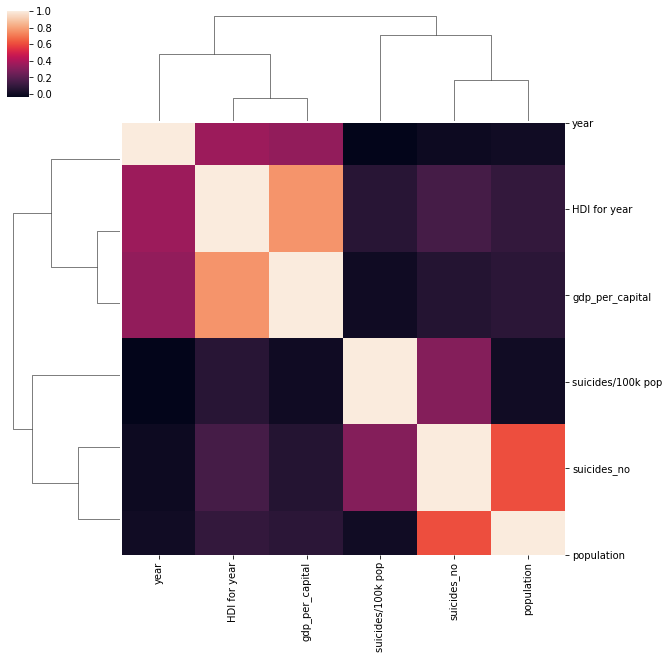

In [104]:
sns.clustermap(sui.corr())

## Train/Test Splitting

In [24]:
X=sui[['population']]
y=sui['suicides_no']

In [25]:
lm=LinearRegression()

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.32,random_state=101)

In [27]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Intercept

In [28]:
print(lm.intercept_)

-19.516640002535524


In [29]:
cf=pd.DataFrame(lm.coef_,X.columns,columns=['coefficient'])

### Coefficient

In [30]:
cf

,coefficient
population,0.000141


In [31]:
from sklearn import metrics

##### Mean Absolute Error(MSA), Mean Squared Error(MSE), Root Mean Squared Error(RMSE)

In [32]:
pred=lm.predict((X_test))
print('MAE: ',metrics.mean_absolute_error(y_test,pred))
print('MSE: ',metrics.mean_squared_error(y_test,pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE:  218.727345950599
MSE:  538148.9789456786
RMSE:  733.5863813796427


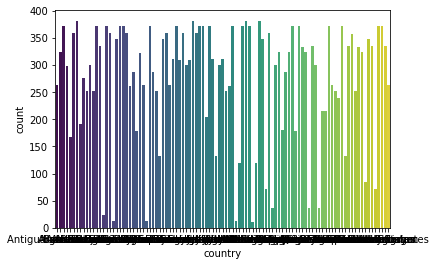

In [33]:
sns.countplot(x='country',data=sui,palette='viridis')

In [34]:
byYear=sui.groupby('year').count()
byYear

,country,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capital,generation
year,,,,,,,,,,,
1985,576,576,576,576,576,576,576,444,576,576,576
1986,576,576,576,576,576,576,576,0,576,576,576
1987,648,648,648,648,648,648,648,0,648,648,648
1988,588,588,588,588,588,588,588,0,588,588,588
1989,624,624,624,624,624,624,624,0,624,624,624
1990,768,768,768,768,768,768,768,600,768,768,768
1991,768,768,768,768,768,768,768,0,768,768,768
1992,780,780,780,780,780,780,780,0,780,780,780
1993,780,780,780,780,780,780,780,0,780,780,780


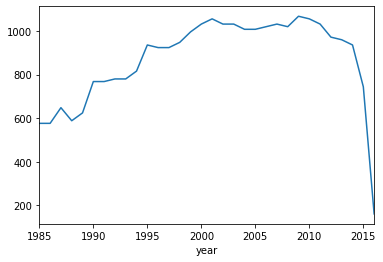

In [35]:
byYear['population'].plot()

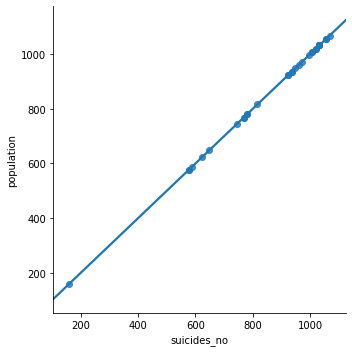

In [36]:
sns.lmplot(x='suicides_no',y='population',data=byYear.reset_index())

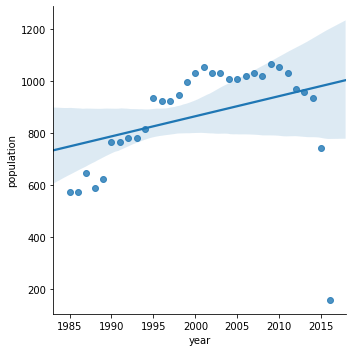

In [37]:
sns.lmplot(x='year',y='population',data=byYear.reset_index())

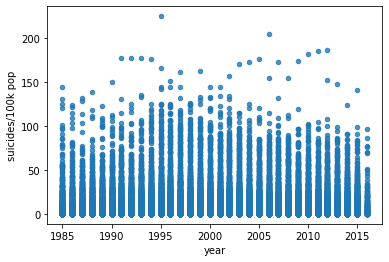

In [38]:
sui.plot(kind="scatter", x="year", y="suicides/100k pop", alpha=0.8)

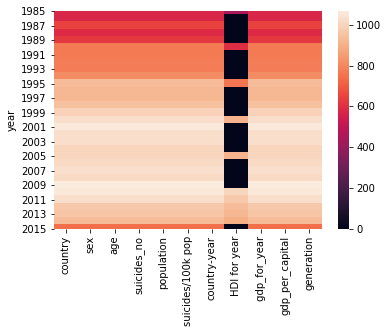

In [150]:
sns.heatmap(byYear)

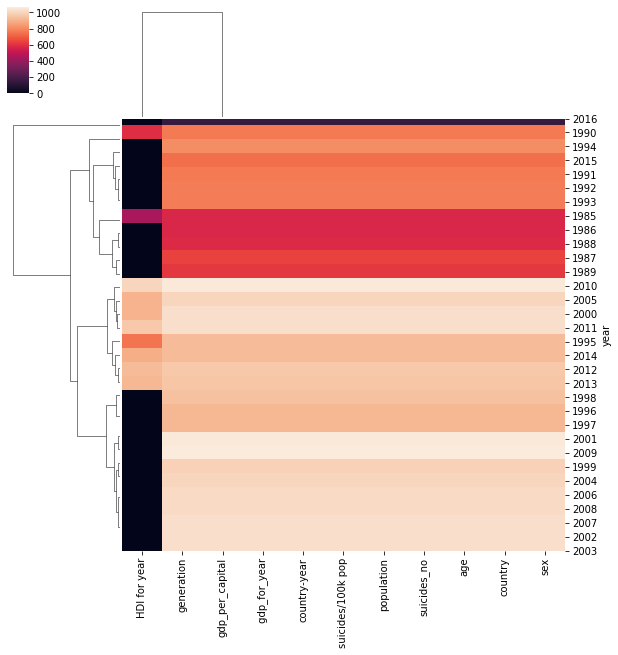

In [151]:
sns.clustermap(byYear)